# FYD 600: Introduction to deep learning and reinforcement learning
### Authors: Jonatan Wårdh, Oleksandr Balabanov and Mats Granath 
(2019, revised 2020.)

# Handout 1: Introduction to fully connected networks

Here we will introduce a simple data classification problem, a linearly separable data set. We will show how this classification can be solved for by using a most simple neural network without any hidden layer. Later, your assignment will be to extend this network in order to solve a non-linearly separable data set for which you need to introduce hidden layers.

The main objective of this exercise is get a grasp of the very basics of artificial neural networks. In this first excercise we will code the network ourselves, without the use of any special pupose library (in Handout 2 we will use TensorFlow). The most demanding and tricky part of this is to set up the training of the network parameters using back propagation.  


These notes gives a very brief introduction to neural networks, focused on the assignment. We refer to the literature (Deep learning book and lecture notes and lecture by Bernhard Mehlig) for a more thorough intro.  

## Generate a linearly separable data set 

We begin by generating the data set. We will choose p=500 data points. Each __state__ consists of a two-dimensional vector (x,y) and is assigned a __label__ which we take to be either -1 or 1. 

We want this data set to be linearly separable, which means that states belonging to the category 1 and -1 should be distinguished by a single straight line in the (x,y) plane. We let this line be defined by $$\vec{n} \cdot (x,y) + c = 0$$ such that states that fulfill $$\vec{n} \cdot (x,y) + c > 0$$ belongs to the category 1 and $$\vec{n} \cdot (x,y) + c < 0$$ to -1. We will consider $\vec{n} = (1,1) \text{ and } c=0$.

In [1]:
# Import libraries
import numpy as np
import matplotlib  
import matplotlib.pyplot as plt 

In [2]:
# Let boundary be defined as n.(x,y) + c = 0
n = np.array([ 1 , 1])
c = 0 

# Generate states as 2 random numbers between -1 and 1
p = 500
states=np.random.rand(p,2)*2-1

# Introduce some noise, let 10% of the data be in the wrong category
noise_rate = 0.1

# Assign labels
labels=np.ones(p)*(-1)

for mu, state in enumerate(states):
    # if the state obeys the condition, set label to 1, or with a 10% probability to -1 
    if np.dot(n,state) + c > 0  or np.random.rand() < noise_rate :
        labels[mu] = 1

In [3]:
# Plot, let red refer to the +1 label and blue to -1 
for mu in range(p):
    if labels[mu] == 1 :
        plt.plot(states[mu,0],states[mu,1],'r.')
    else :
        plt.plot(states[mu,0],states[mu,1],'b.')
    
plt.axis([-1, 1, -1, 1])
plt.show()

Here we clearly see what is meant by a linearly separable problem. The boundary between the two labels, generally called the decision boundary, is a straight line. 

We also introduced some noise, meaning that some +1 states have ended up in what would otherwise be categorized as belonging to the -1 set. At this point it is not very important to discuss the nature of the noise (you can also remove it if you like). However, in real-life data there is always some kind of noise and any successful categorization method must be able to treat noisy data. For instance, using neural networks we are often interested in general features, like whether a photo depicts a cat or a dog, therefore we do not want the network to be sensitive to irrelevant details.

## The basics of a fully connected neural network

We are now ready to set up a network to solve for the classification task above. A network is a system defined by a set of parameters, call it $\Theta$, and performs the mapping $\vec{x} \rightarrow \vec{O}(\vec{x})$ where $\vec{x}$ is an input state and $\vec{O}(\vec{x})$ the output of the system. 

In this part of the course we will consider supervised learning, for which we have a set of states $X = \{\vec{x} \}$ with known labels $Y=\{ \vec{y}\}$. We use this set to $\textit{train}$ the network. We want the network to map each state $\vec{x}$ to the corresponding label $\vec{y}$, that is we want to pick the parameters $\Theta$ such that $\vec{O}(\vec{x})=\vec{y}$ for each state $\vec{x}$. The goal is then to let the network categorize another set of states without known labels. Hopefully the network has learned the right categorization procedure from the training set for it to correctly predict labels of previously unknown data.  

In general a neural network works by mapping a state through a number of layers of neurons (or nodes). The neurons are the processing units, whose actions are defined by the parameters $\Theta$ of the network. In a fully connected network, which is what we will consider here, each layer consists of a set of neurons which all are connected to every neurons in the previous layer. Every network consist of at least an output layer, but could also include additional hidden layers. (A hidden layer is a layer whose result is just passed through to another layer, its output is "hidden".) The inputs are often considered as a layer as well, but it is trivial and does not preform any calculation. Below we depict a fully connected network with one hidden layer (the network should be read from left to right)
<img src="network2.png" width=200 height=200>
We will mark the input layer with filled dots to distinguish it from the other layers.

The values of the neurons, $h^{(1)}_i$, in the hidden layer is given by 

$$a^{(1)}_i = \sum_{j} w^{(1)}_{ij} x_j - b^{(1)}_i \\ h^{(1)}_i = g(a^{(1)}_i)$$

where $i$ is the index of the neurons in the hidden layer and $j$ the index of the neuron in the input layer ($x_j$ is an elements of $\vec{x}$). (The superscript 1 refers to the first hidden layer.) We see that each neuron, $i$, in the hidden layer linearly maps the input $\vec{x}$ to $a^{(1)}_i$ which is then fed through an activation function $g$ giving the state value at that neuron $h^{(1)}_i$. Note that the index $i,j$ in the sums ranges over the whole set of elements which is determined by the dimensions of $w^{(1)}$, the weight matrix of layer 1. In the example above $j=1,2,3$ and $i=1,2,3$. (Equivalently we can think of $w^{(1)}_{ij}$ as the vector, with index $j$, of weights of neuron number $i$ in layer 1.) 

The activation function can be thought to mimic the action of a biological neuron which gets activated if the input reaches a critical value. However, different activation functions may be sutable for different types of problems, going beyond the analogy with an on$/$off caricature of a biological neuron. In this exercise we will use 

$$g(a)=\tanh(a)$$

which could be seen as a smoothened (differentiable) version of the sign function. (So if the projection $\sum_j w_{ij}x_j > b_i$ the output is $\approx +1$ and if $\sum_j w_{ij}x_j < b_i$ the output is $\approx -1$. )

Similarly the values $h^{(1)}_i$ in the hidden layer gets mapped to the neurons in the next layer 

$$a^{(2)}_i = \sum_{j} w^{(2)}_{ij} h^{(1)}_j - b^{(2)}_i \\ h^{(2)}_i = g(a^{(2)}_i)$$

where in the example above $i=1,2$ now. (Keeping track of range of indices can be a bit of a challenge, especially when coding this.) 
We could continue by mapping $h^{(2)}_{i}$ to yet another hidden layer, but in the example above this is the last layer, the output layer, and we identify $h^{(2)}_i$ with the output $O_i$ of the network.

We see that the $i-$th neuron in layer $l$ is associated with a weight vector $w^{(l)}_{ij}$ and bias $b^{(l)}_i$. These values corresponds to the parameters $\Theta$ of the network $\Theta = \{w^{(1)},b^{(1)}... w^{(L)},b^{(L)} \}$ where $L$ is the number of hidden layers plus the output layer.

So far we have not talked about how to pick the parameters $\Theta$ (more than that we want it to yield $\vec{y}=\vec{O}$ in the end). We will need to update $\Theta$ in many small steps throughout the training. In general the training is divided into $\textit{epochs}$. In each epoch the following steps are done: 


0) Only first epoch: initialize $\Theta$ in some suitable way (usually from some probability distribution).

1) Propagate the training states through the network and produce an output. Often referred to as __forward-propagation__.

2) Calculate the error between output and labels by using some suitable loss (or cost) function, $H$. Training the network is then the same thing as minimizing $H$. We can minimize $H$ by gradient descent and the first step is therefore to calculate the full gradient. It turns out that we can calculate the gradient by propagating the error $\textit{backwards}$ through the network. Thus, this step is called __back-propagation__.  (Step 1 and 2 are often done in conjunction.)

3) Update $\Theta$ according to gradient descent.

Iterate 1)-3) until the network performs well. In practice, the iteration is often done using a subgroup of the data, a mini-batch, a.k.a. batch. An epoch then corresponds to a sequence of iterations covering the full training data set. 

We will turn to the details of how the training is done shortly, but before that we will regress to our problem at hand and perform step 0-1.

## Setting up network

To solve the classification task defined above we will use the simplest possible network, i.e. a network without any hidden layers, depicted as
<img src="network3.png" width=120 height=120>

In this case the input $\vec{x}$ will consist of only two parameters $(x_1,x_2)$ and the output will be a single value $O_1$. There is only one real neuron in this problem and it is associated by the $1\times2$ matrix $w$ and the scalar $b$. These constitutes the parameters $\Theta$ of the problem.

Note that we do not have a single pair of state and label, but rather a whole set, in this case $p=500$. Below we will index these different states with the index $\mu$ which ranges through $\mu = 1,2... p$. Here we will feed the whole training set through the network at once, thus we will need to assign the label $\mu$ to $a,b,h$ and $O$ as well, which all depend on the state.


In [6]:
# setup a and h 
a = np.zeros(p)
h_Out = np.zeros(p)

# initialize network parameters
b = 0 
# let initial values of w come from a normal distribution with mean 0 and standard deviation 1
mean = 0 
std = 1
w = np.random.normal(mean,std,2)

# activation function
def g(x) : return np.tanh(x)

# propagate all states through the network

h_Out = g(np.matmul(w.T,states.T) - b)  #transpose for proper matrix multiplication

# Lastly, at the output stage, we classify the output data as
# beeing 1 if it is above 0, and -1 if it is below 0
Out = np.zeros(h_Out.shape)  
for mu, out in enumerate(h_Out):
    if out > 0 : 
        Out[mu] = 1
    else :
        Out[mu] = -1 


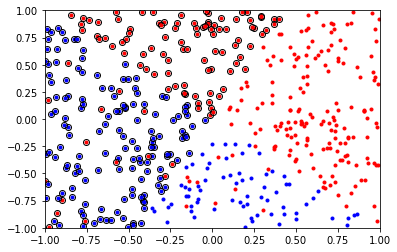

In [7]:
# Include the classification of the network as circles

# Plot, let red be in the set 
for mu in range(p):
    if labels[mu] == 1 :
        plt.plot(states[mu,0],states[mu,1],'r.')
    else :
        plt.plot(states[mu,0],states[mu,1],'b.')
    # plot classification of network as circles    
    if Out[mu] == 1 :
        plt.plot(states[mu,0],states[mu,1],'ko',mfc='none')
    
plt.axis([-1, 1, -1, 1])
plt.show()

We see that the network does a nice division into two regions. However completely wrong regions since the network was just initialized randomly. (It may happen that the classification looks decent by chance, if so run again.) This should come as no surprise since the network simply does the mapping $a = \vec{w} \cdot \vec{x} - b$ (and $O = g(a)$ where $g(x)$ switches rapid from $-1$ to $1$ at $x=0$) which is just the equation of a straight line. Let us plot this line, or decision boundary, as well. 

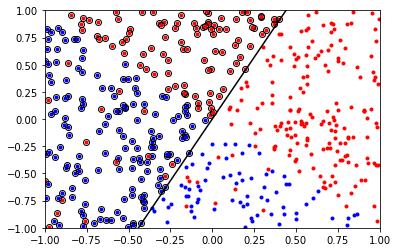

In [8]:
# Plot, let red be in the set 
for mu in range(p):
    if labels[mu] == 1 :
        plt.plot(states[mu,0],states[mu,1],'r.')
    else :
        plt.plot(states[mu,0],states[mu,1],'b.')
    # plot classification of network as circles     
    if Out[mu] == 1 :
        plt.plot(states[mu,0],states[mu,1],'ko',mfc='none')
    
# Plot the decision bondary of the network
x1_span = np.linspace(-1,1,100)
x2_span = (-w[0]*x1_span + b ) / w[1] # Solves the equation w.(x1,x2)-b = 0 for x2
plt.plot(x1_span,x2_span,'k')
    
plt.axis([-1, 1, -1, 1])
plt.show()

## Training the network (back-propagation) 

(_This section is based on the book Neural Networks and Deep Learning, by Michael Nielsen_)

We have seen how to propagate a state through the network. Let us now turn to the complete training. As mentioned above each training iteration consists of three steps:

1) Propagate a subset of the training states through the network and produce an output. Often referred to as __forward-propagation__.

2) Calculate the error between output and labels by using some suitable loss (or cost) function, $H$. Training the network is then the same thing as minimizing $H$. We can minimize $H$ by gradient descent and the first step is therefore to calculate the full gradient. It turns out that we can calculate the gradient by propagating the error $\textit{backwards}$ through the network. Thus, this step is called __back-propagation__.

3) Update $\Theta$ according to gradient descent.

What remains is to perform step 2 and 3. To do this we need to define a loss function. A loss function should be a function which measures the error of the network. By defining this function we can reinterpret the training as minimizing the loss function. A natural and simple choice is to use the mean square error between the true label and the output from the network (the $\frac{1}{2}$ is just for convenience when taking derivative on this)

$$H(\Theta)= \frac{1}{2p} \sum_{\mu=1}^{p}|\vec{y}_\mu-\vec{O}(\vec{x}_\mu,\Theta)|^2= \frac{1}{2p} \sum_{\mu=1}^{p}\sum_{i} (y_{i,\mu}-O_{i}(\vec{x}_\mu,\Theta))^2.$$

Here $y_{i,\mu}$ refers to the $i$'th element(neuron) in the label of the state $\mu$ where $\mu = 1,2... p$ (the size of a mini-batch) and $O_i(\vec{x}_\mu,\Theta)$ is the corresponding output of the network.  We clearly see that $H$ has a minimum if $\vec{y}_{\mu}=\vec{O}(\vec{x}_\mu,\Theta)$ for all data points $\mu$, which is what we will train towards. (Depending on the size of the network versus the size and variability of the data set, this absolute minimum will typically not be possible to achieve. In fact, it will not in general be the objective of the training, because it would mean that we fit to all features of the data including noise. This is what is called "overfitting", as discussed further into the assignement.)  

Given a training set, $H$ only depends on $\Theta = \{w^{(1)},b^{(1)}... w^{(L)},b^{(L)} \}$ which we can update according to $\Theta_k\rightarrow \Theta_k+\Delta \Theta_k$ with

$$\Delta \Theta_k = - \eta \frac{\partial H}{\partial \Theta_k}=-\frac{\eta}{2p}\sum_\mu\frac{\partial H_\mu}{\partial \Theta_k}$$

(i.e. "gradient descent") where $\eta$ is the learning rate and $k$ goes through the whole set of parameters (all weights and biases in the network). The total update is just the mean of the contribution from the data set and we will subsequently not write out $\mu$ explicitly to make the notation lighter. (It should be understood that we do this for each data point and then average.) 

It is now in principle straight forward to evaluate the contribution from one data point $\delta \Theta_k$ (again dropping $\mu$) 

$$ \frac{\partial H}{\partial \Theta_k} = - \sum_{i} (y_i-O_{i}(\vec{x},\Theta)) \frac{\partial O_{i}(\vec{x},\Theta)}{\partial \Theta_k}$$

where we need to use the chain rule to evaluate the partial derivatives. 

We will not go through this calculation in detail here, but you are encouraged to go through it yourself. It turns out that we can write the update as 

$$\Delta w^{l}_{ij} = \eta \delta^{l}_i h^{l-1}_j $$
$$\Delta b^{l}_{i} = - \eta \delta^{l}_i $$

for $l=1,2...L$. Here $\vec{h}^{l-1}$ is the output of layer $l-1$ (with $\vec{h}^{0}=\vec{x}$) corresponding to the input of layer $l$  and $\vec{\delta}^{l}$ is the error in layer $l$. The form of the shift is quite intuitive, corresponding for the weights to the input to the layer times the error in that layer, while for the biasesthat don't couple to the input it's only the error. The error is given by 

$$\delta^{L}_{i} = g'(a^{L}_i)(y_i-O_i) $$

in the output layer, and 

$$ \delta^{l}_{j} = \sum_{i} \delta^{l+1}_i w^{l+1}_{ij} g'(a^{l}_j) $$

in the earlier layers  $l = L-1,L-2... 1$.

We see that the error in a layer is dependent on the error in the layer which it feeds into. We can therefore calculate the error in each layer by starting at the output and propagate it backwards through the network. 

Remember, $w^{l+1}_{ij}$, is such that $i$ runs over the number of nodes in layer $l+1$ and $j$ runs over the  number of nodes in layer $l$. Take care not to confuse the indices, the weight matrix is not symmetric! (In general it's not even a square matrix.)

We will now implement the whole training for the single neuron "network". 

In [23]:
# iterate this cell several times in order to continue training

# the update rate 
eta = 0.5

# derivative of activation function
def g_prim(x) : return np.cosh(x)**(-2)


nr_epochs = 10
for epoch in range(nr_epochs):
       
    Htot=0 
    Delta_b=0
    Delta_w=0
    
    #loop over states, could also have been done more succinctly without the loop 
    #but with greater risk to have problems with the matrix multiplication
    for mu in range(p): 
        label=labels[mu]  #current label
        state=states[mu]  #current state
        a=np.matmul(w,state) - b    
        O=g(a)    #output
        # loss
        H = (label - O)**2 /2

        # calculate the error delta^{(L)}
        delta_out = g_prim(a) * ( label - O )

        # add the gradient of current state to the running average over all states
        Delta_b += -eta * delta_out / p 
        Delta_w += eta * delta_out * state / p 
        
        Htot+=H/p
     
    #make the gradient descent update of weights and biases 
    b += Delta_b
    w += Delta_w

    print("Loss : " + str(Htot) )
    #print("w : " + str(w) )
    # print("theta : " + str(theta) )
    print("=========================")



Loss : 0.1703463848403859
Loss : 0.1700223808760578
Loss : 0.16970539616074495
Loss : 0.1693951678213037
Loss : 0.16909144673002294
Loss : 0.16879399657098942
Loss : 0.1685025929873336
Loss : 0.16821702280037465
Loss : 0.1679370832929441
Loss : 0.16766258155023278


In [24]:
#Results

# update output through network

h_Out = g(np.matmul(w.T,states.T) - b)  #transpose for proper matrix multiplication

Out = np.zeros(h_Out.shape)  #output label
Accuracy=1

for mu, out in enumerate(h_Out):
    if out > 0 : 
        Out[mu] = 1
    else :
        Out[mu] = -1 
    if Out[mu] != labels[mu] :
        Accuracy -= 1/p
        
# ============ Plot =========
for mu in range(p):
    if labels[mu] == 1 :
        plt.plot(states[mu,0],states[mu,1],'r.')
    else :
        plt.plot(states[mu,0],states[mu,1],'b.')
    # plot classification of network as circles     
    if Out[mu] == 1 :
        plt.plot(states[mu,0],states[mu,1],'ko',mfc='none')
    
# Plot the decision bondary of the network
x1_span = np.linspace(-1,1,100)
x2_span = (-w[0]*x1_span + b ) / w[1]
plt.plot(x1_span,x2_span,'k')
    
plt.axis([-1, 1, -1, 1])
plt.show()
# ============ end Plot =========
print("Accuracy : " + str(Accuracy) )
print("Loss : " + str(Htot) )

Accuracy : 0.9279999999999999
Loss : 0.16766258155023278


Iterate the two cells above to see how the decision boundary approaches the correct line as the energy function decreases.

The accuracy correspond to the fraction of states that are classified correctly. This is typically the measure that we want to use to quantify the performance of our network. It will be related to the loss but it's not equivalent.  

## Data sets:  training and validation set

As mentioned above, the overall aim when doing supervised learning with help of a neural network is for it to learn general features of some set of data and based on that make predictions on another set of data, that share those general features. The data that the network is trained on is called __training set__. However, all sets of data will have features that are unique to that specific set of data. The danger when training a network is therefore that it will learn specific features of the training set, features that are not shared with the more general data. This means that the network could classify according to the wrong principles and when presented with a new set of data the network will perform poorly in classifying it. This problem (as mentioned earlier) is called __overfitting__.

As an example imagine a network being presented with a set of pictures of dogs, lets say 10 different dogs. If the network is then heavily trained on this training set it could end up recognizing only these 10 specific dogs, meaning that it would not recognize any other dog as a dog. Also the set of pictures might be biased towards some other feature having nothing to do with dogs, like all pictures being taken outdoors. This is of course not the networks fault, it only tries to work out the most suitable correlation between indata and outdata.

So how to resolve this? Well first of all the training set must contain a lot of pictures, maybe 10000 pictures of dogs and not 10. Since the network consists on a limited set of parameters (here there is an interplay between size of network and complexity of data) it has no chance of learning all specific features of all individual pictures. Also by doing this all other unintentional biases of the data are hopefully averaged out. But the problem will still remain to some extent. If we train the network long enough it will typically end up refining the parameters in order to fit to specific features of the training set. To resolve this one uses a __validation set__ containing the same type of data as the training set. The trick is then to let the network classify the validation set during training as well, but the updates of the network are only based on the training set. When the network is staring to learn specific features of the training set it will perform worse in classifying the validation set (or no further improvement is achieved). At this point we terminate the training, referred to as early stopping.

In this problem we are not using any validation set since we can easily check ourself if the network has found the right principle. But we will return to this topic in Handout nr 2.


# Assignment. Classify non-linearly separable problems 

We saw above that a network without any hidden layer will simply divide the data set into two regions determined by a line defined by the parameters $w,b$. This means that this kind of network will only be able to solve linearly separable problems, an example of which we saw above. This is of course a very restricted set of problems and in general we need to consider more complex networks. For instance problems that are not linearly separable will need one hidden layer or more. 

Below we will present two different data sets that requires at least one or two hidden layers respectively to solve.

## Dataset 1: One hidden layer

In [15]:
# Generate states as 2 random numbers between -1 and 1
p = 500
states_set1=np.random.rand(p,2)*2-1

# Let boundary be defined as n.(x,y) + c = 0
n = (np.array([ 0.5 , 0.5]),np.array([ 0.5 , 0.5]))
c = (0.2,-0.2)

# Introduce some noise if you like
noise_rate = 0

# Assign labels
labels_set1=np.ones(p)*(-1)

for mu, state in enumerate(states_set1):
    # if the state obeys the condition, set label to 1, or with a 10% probability to -1 
    if (np.dot(n[0],state) + c[0] > 0 and np.dot(n[1],state) + c[1] < 0) or np.random.rand() < noise_rate:
        labels_set1[mu] = 1        
        

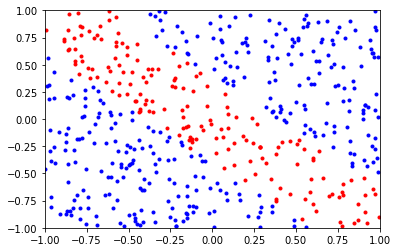

In [16]:
# Plot, let red refer to the +1 label and blue to -1 
for mu in range(p):
    if labels_set1[mu] == 1 :
        plt.plot(states_set1[mu,0],states_set1[mu,1],'r.')
    else :
        plt.plot(states_set1[mu,0],states_set1[mu,1],'b.')
    
plt.axis([-1, 1, -1, 1])
plt.show()

It is easy to see that this problem cannot be solved by inserting a single decision boundary. To solve for this data set you must must implement one hidden layer:
<img src="network_b.png" width=250 height=250>


## Dataset 2: Two hidden layers

In [165]:
# Generate states as 2 random numbers between -1 and 1
p = 500
states_set2=np.random.rand(p,2)*2-1

# Introduce some noise if you like
noise_rate = 0

# Assign labels
labels_set2=np.ones(p)*(-1)

for mu, state in enumerate(states_set2):
    # if the state obeys the condition, set label to 1, or with a 10% probability to -1 
    if state[0] * state[1] > 0 or np.random.rand() < noise_rate:
        labels_set2[mu] = 1        

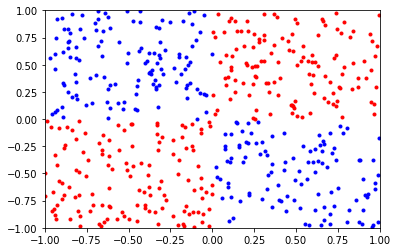

In [166]:
# Plot, let red refer to the +1 label and blue to -1 
for mu in range(p):
    if labels_set2[mu] == 1 :
        plt.plot(states_set2[mu,0],states_set2[mu,1],'r.')
    else :
        plt.plot(states_set2[mu,0],states_set2[mu,1],'b.')
    
plt.axis([-1, 1, -1, 1])
plt.show()

This data set is even more complex and you will need two hidden layers:
 <img src="network_a.png" width=300 height=300>

## Questions

### Dataset 1

Write your own fully connected network with one hidden layer with two neurons and implement back-propagation. (It's perfectly alright to use and expand on the single node example. ) Write the code in such a way that it is simple to change the number of neurons in the hidden layer. (But, unless you are very comfortable coding this, we recommend not to make a code for arbitrary number of layers.) Initialize the biases $b$ to $0$ and pick the values of $w$ from a normal distribution with mean $0$ and standard deviation $0.5$. Set the learning rate to $\eta=0.3$. Calculating the loss and accuracy for each epoch and store the values.

A problem while training a network is the possibility of getting stuck in bad local minima. To find the global minimum is impossible for typical realistic problem (although it is be possible for this example with so few parameters) but one wants to find as good as possible local minimum. In the example above we fed the whole training set (all 500 data points) through the network in each epoch and then performed the update of the parameters after back-propagation, i.e. the update was an average over all samples in the training set.  If you use the same method in this assignment there is a high probability that you will get stuck in a bad local minimum. For instance we sometimes got stuck at $H \approx 0.38$ with an accuracy of about $71 \%$. However since we initialize the weights randomly you can try to run it with new weights a few times to find a better minimum with accuracy of about $99 \%$, or try to increase the variance of starting weights. To decrease the chance of getting stuck in bad local minimum you can also try to indrease the number of neurons in the hidden layer. (The more parameters there are the less likely the algorithm is to get stuck as a mimum requires positive second derivatives in all directions. Think of the fraction of minima to saddle points.)

__a)__ After the training __plot loss and accuracy as a function of epochs__. 

__b)__ Plot the prediction of the networks as we did above, i.e. __by plotting circles around points predicted to be within the +1 set__. Also plot the two __decision boundaries__ associated with the hidden layer.

One way to get the network to avoid getting stuck in local minima is to not train the network on the whole training set at once. It is often better to divide the training set in smaller batches, so called mini-batches, which are picked randomly from the whole training set. Doing this you would go through all mini-batches in each epoch and update the parameters after every mini-batch. I.e. the average in the update is taken over one mini-batch instead of the whole training set. This procedure introduce randomness in the update of the parameters which might help with getting stuck in local minima. This is called __stochastic gradient descent (SGD)__ and is the standard way to train a neural network. 

__c)__ Implement the stochastic gradient descent (mini-batch training) using the original hyper-parameters (initialization of weights and learning rate). In the beginning of each epoch randomly permute the training set (states and labels in the same way). Construct 50 mini batches of size 10 by assigning the first 10 entries of the (permuted) training set to batch 1 then the next 10 entries to batch 2 etc. Propagate the first batch through the network, calculate the associated errors using back-propagation and then update the parameters. Do the same thing with the remaining 49 batches. The next epoch should start with randomly permuting the training set again. Redo a) and b) using batch training. Do you avoid getting stuck in the bad local minimum?

__d)__ Take a look at the weights and biases $w,b$ of the hidden and output layer. Can you work out how the network is able to classify the data?



### Dataset 2

We now turn to the next set. In principle this is possible to solve using 2 hidden layers with two neurons each. However this network will also quite easily get stuck at local minima. One way to resolve this is to include 3 neurons in each hidden layers instead of only two.

__a)__ Implement two hidden layers with three neurons each. Use the same parameters as for the last set. Write the code in such a way that it is simple to change the number of neurons in each layer. What happens if there are only two neurons in the first hidden layer? After the training __plot H and the accuracy as a function of epochs__ .

__b)__ Plot the __decision boundaries__ associated with the first hidden layer just as in question b) for set 1.
